<a href="https://colab.research.google.com/github/bild12/EspIA/blob/main/Unidad2_2_EstrategiasBusqueda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estrategias de búsqueda en el espacio-problema

En este cuaderno se practicará el uso de las diferentes estrategias de búsqueda a partir de un ejemplo guiado.

El ejemplo guiado está basado en la implementación hecha por Daniel Connelly, que se puede consultar en https://dhconnelly.com/paip-python/docs/paip/search.html.

## Implementación de búsquedas

**Caso base (general)**

Dados unos estados iniciales, la idea es explorar el espacio de estados hasta alcanzar la meta esperada. Para esto, se definirá una función que toma los siguientes elementos:
*   `estados`, lista de estados iniciales
*   `meta_alcanzada`, un predicado que al evaluarse en un estado particular retorna verdadero (`True`) si el estado corresponde a la meta deseada.
*   `obtener_descendientes`, una función que al tomar un estado como entrada retorna una lista de los estados descendientes.
*   `combinar_estados`, una función que toma dos listas de estados (estados actuales y nuevos estados) y retorna una lista combinada de estados.

De forma básica, genera un recorrido recurrente a partir de una lista de estados que se establece usando los descendientes de cada uno.

In [ ]:
def busqueda_arbol(estados, meta_alcanzada, obtener_descendientes, combinar_estados):
  if not estados:
    return None
  if meta_alcanzada(estados[0]):
    return estados[0]

  descendientes = obtener_descendientes(estados[0])
  siguientes = combinar_estados(descendientes, estados[1:])

  return busqueda_arbol(siguientes, meta_alcanzada, obtener_descendientes, combinar_estados)

**Búsqueda en profundidad (DFS)**

Todos los descendientes de un único estado son explorados totalmente antes de pasar a un estado hermano. Se utiliza una lista de estados, que se van agregando en una estructura que funciona como una pila (último que entre primero que sale).

In [ ]:
def dfs(inicio, meta_alcanzada, obtener_descendientes):

  def combinar(nuevos_estados, estados_existentes):
    return nuevos_estados + estados_existentes

  return busqueda_arbol([inicio], meta_alcanzada, obtener_descendientes, combinar)

**Búsqueda en anchura (BFS)**

Al examinar un único estado, todos sus descendientes deben revisarse antes de explorar alguno de los descendientes de ellos. En la lista de estados, los nuevos estados se agregan luego de los actuales, funcionando como una cola (primero que entra primero que sale).

In [ ]:
def bfs(inicio, meta_alcanzada, obtener_descendientes):

  def combinar(nuevos_estados, estados_existentes):
    return estados_existentes + nuevos_estados

  return busqueda_arbol([inicio], meta_alcanzada, obtener_descendientes, combinar)

**Búsqueda Best-First**

En esta búsqueda, el espacio de estados se explora de acuerdo a un costo calculado. Es decir, el estado de menor costo es el siguiente a explorar. Se requiere una función que permita calcular el costo (numérico) para un estado dado.

In [ ]:
def busq_best_first(inicio, meta_alcanzada, obtener_descendientes, costo):

  def combinar(nuevos_estados, estados_existentes):
    return sorted(nuevos_estados + estados_existentes, key=costo)

  return busqueda_arbol([inicio], meta_alcanzada, obtener_descendientes, combinar)

## Definición del problema

Una vez definidas las posibles búsquedas a utilizar, es necesario implementar la definición de los elementos identificados en el espacio-problema (estados posibles, estado inicial y final, acciones y operadores). Se utilizarán algunas funciones que ayudarán con la exploración del espacio de estados, y luego se definirá el problema con todos sus detalles.

In [ ]:
def descendientes(estados, operadores):
    ret = []
    for op in operadores_aplicables(estados, operadores):
        ret.append([e for e in estados if e not in op['quitar']] + op['agregar'])
    return ret

def operadores_aplicables(estados, operadores):
    estados = set(estados)
    return [op for op in operadores if set(op['preconds']) <= estados]

def resolver_problema(estados_iniciales, estados_objetivo, operadores, metodo):
    prefijo = 'Ejecutando '
    for operador in operadores:
        operador['agregar'].append(prefijo + operador['accion'])

    def obtener_descendientes(estados):
        return descendientes(estados, operadores)

    def meta_alcanzada(estados):
        for meta in estados_objetivo:
            if meta not in estados:
                return False
        return True

    def costo(estados):
        sum = len([e for e in estados if e.startswith(prefijo)])
        sum += len([m for m in estados_objetivo if m not in estados])
        return sum

    if metodo is busq_best_first:
        final = metodo(estados_iniciales, meta_alcanzada, obtener_descendientes, costo)
    else:
        final = metodo(estados_iniciales, meta_alcanzada, obtener_descendientes)
    return [estado for estado in final if estado.startswith(prefijo)]


Una vez implementados todos los elementos necesarios, pasemos a la definición formal del problema a resolver. En este caso, trabajaremos con un problema de apilamiento de bloques, en donde se busca acomodar los bloques desde una configuración inicial hasta un objetivo específico. Cada bloque sólo puede tener otro bloque encima de él, aunque pueden apilarse hasta una altura arbitraria. La única acción que puede realizarse es mover un único bloque que no tiene nada encima, para ponerlo encima de otro bloque o encima de la mesa de trabajo. En particular, se espera resolver la siguiente configuración:

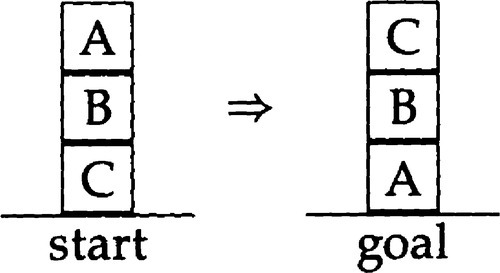

A continuación, se definirán los elementos del problema de forma que puedan ser utilizados por la implementación ya realizada para proponer una posible solución.

In [ ]:
def main():
  inicio = ["vacio sobre A", "A sobre B", "B sobre C", "C sobre mesa", "vacio sobre mesa"]
  meta = ["vacio sobre C", "C sobre B", "B sobre A", "A sobre mesa", "vacio sobre mesa"]
  operaciones = [
        {
            "accion": "mover A de B a C",
            "preconds": [
                "vacio sobre A",
                "vacio sobre C",
                "A sobre B"
            ],
            "agregar": [
                "A sobre C",
                "vacio sobre B"
            ],
            "quitar": [
                "A sobre B",
                "vacio sobre C"
            ]
        },
        {
            "accion": "mover A de mesa a B",
            "preconds": [
                "vacio sobre A",
                "vacio sobre B",
                "A sobre mesa"
            ],
            "agregar": [
                "A sobre B"
            ],
            "quitar": [
                "A sobre mesa",
                "vacio sobre B"
            ]
        },
        {
            "accion": "mover A de B a mesa",
            "preconds": [
                "vacio sobre A",
                "vacio sobre mesa",
                "A sobre B"
            ],
            "agregar": [
                "A sobre mesa",
                "vacio sobre B"
            ],
            "quitar": [
                "A sobre B"
            ]
        },
        {
            "accion": "mover A de C a B",
            "preconds": [
                "vacio sobre A",
                "vacio sobre B",
                "A sobre C"
            ],
            "agregar": [
                "A sobre B",
                "vacio sobre C"
            ],
            "quitar": [
                "A sobre C",
                "vacio sobre B"
            ]
        },
        {
            "accion": "mover A de mesa a C",
            "preconds": [
                "vacio sobre A",
                "vacio sobre C",
                "A sobre mesa"
            ],
            "agregar": [
                "A sobre C"
            ],
            "quitar": [
                "A sobre mesa",
                "vacio sobre C"
            ]
        },
        {
            "accion": "mover A de C a mesa",
            "preconds": [
                "vacio sobre A",
                "vacio sobre mesa",
                "A sobre C"
            ],
            "agregar": [
                "A sobre mesa",
                "vacio sobre C"
            ],
            "quitar": [
                "A sobre C"
            ]
        },
        {
            "accion": "mover B de A a C",
            "preconds": [
                "vacio sobre B",
                "vacio sobre C",
                "B sobre A"
            ],
            "agregar": [
                "B sobre C",
                "vacio sobre A"
            ],
            "quitar": [
                "B sobre A",
                "vacio sobre C"
            ]
        },
        {
            "accion": "mover B de mesa a A",
            "preconds": [
                "vacio sobre B",
                "vacio sobre A",
                "B sobre mesa"
            ],
            "agregar": [
                "B sobre A"
            ],
            "quitar": [
                "B sobre mesa",
                "vacio sobre A"
            ]
        },
        {
            "accion": "mover B de A a mesa",
            "preconds": [
                "vacio sobre B",
                "vacio sobre mesa",
                "B sobre A"
            ],
            "agregar": [
                "B sobre mesa",
                "vacio sobre A"
            ],
            "quitar": [
                "B sobre A"
            ]
        },
        {
            "accion": "mover B de C a A",
            "preconds": [
                "vacio sobre B",
                "vacio sobre A",
                "B sobre C"
            ],
            "agregar": [
                "B sobre A",
                "vacio sobre C"
            ],
            "quitar": [
                "B sobre C",
                "vacio sobre A"
            ]
        },
        {
            "accion": "mover B de mesa a C",
            "preconds": [
                "vacio sobre B",
                "vacio sobre C",
                "B sobre mesa"
            ],
            "agregar": [
                "B sobre C"
            ],
            "quitar": [
                "B sobre mesa",
                "vacio sobre C"
            ]
        },
        {
            "accion": "mover B de C a mesa",
            "preconds": [
                "vacio sobre B",
                "vacio sobre mesa",
                "B sobre C"
            ],
            "agregar": [
                "B sobre mesa",
                "vacio sobre C"
            ],
            "quitar": [
                "B sobre C"
            ]
        },
        {
            "accion": "mover C de A a B",
            "preconds": [
                "vacio sobre C",
                "vacio sobre B",
                "C sobre A"
            ],
            "agregar": [
                "C sobre B",
                "vacio sobre A"
            ],
            "quitar": [
                "C sobre A",
                "vacio sobre B"
            ]
        },
        {
            "accion": "mover C de mesa a A",
            "preconds": [
                "vacio sobre C",
                "vacio sobre A",
                "C sobre mesa"
            ],
            "agregar": [
                "C sobre A"
            ],
            "quitar": [
                "C sobre mesa",
                "vacio sobre A"
            ]
        },
        {
            "accion": "mover C de A a mesa",
            "preconds": [
                "vacio sobre C",
                "vacio sobre mesa",
                "C sobre A"
            ],
            "agregar": [
                "C sobre mesa",
                "mesa sobre A"
            ],
            "quitar": [
                "C sobre A"
            ]
        },
        {
            "accion": "mover C de B a A",
            "preconds": [
                "vacio sobre C",
                "vacio sobre A",
                "C sobre B"
            ],
            "agregar": [
                "C sobre A",
                "vacio sobre B"
            ],
            "quitar": [
                "C sobre B",
                "vacio sobre A"
            ]
        },
        {
            "accion": "mover C de mesa a B",
            "preconds": [
                "vacio sobre C",
                "vacio sobre B",
                "C sobre mesa"
            ],
            "agregar": [
                "C sobre B"
            ],
            "quitar": [
                "C sobre mesa",
                "vacio sobre B"
            ]
        },
        {
            "accion": "mover C de B a mesa",
            "preconds": [
                "vacio sobre C",
                "vacio sobre mesa",
                "C sobre B"
            ],
            "agregar": [
                "C sobre mesa",
                "vacio sobre B"
            ],
            "quitar": [
                "C sobre B"
            ]
        }
    ]
  #print("Resolviendo con profundidad: ")
  #for accion in resolver_problema(inicio, meta, operaciones, dfs):
  #  print(accion)

  print("Resolviendo con anchura: ")
  for accion in resolver_problema(inicio, meta, operaciones, bfs):
    print(accion)

  print("Resolviendo con Best-First: ")
  for accion in resolver_problema(inicio, meta, operaciones, busq_best_first):
    print(accion)

Ahora, vamos a ejecutarlo para utilizar las diferentes búsquedas y así encontrar una posible solución al problema de apilar bloques.

In [ ]:
main()

Resolviendo con anchura: 
Ejecutando mover A de B a mesa
Ejecutando mover B de C a A
Ejecutando mover C de mesa a B
Resolviendo con Best-First: 
Ejecutando mover A de B a mesa
Ejecutando mover A de B a mesa
Ejecutando mover B de C a A
Ejecutando mover B de C a A
Ejecutando mover C de mesa a B
Ejecutando mover C de mesa a B
